In [24]:
# importe as principais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, r2_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

# import warnings filter
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'mlxtend'

In [25]:
red = pd.read_csv("./datasets/winequality-red.csv", sep=";")
white = pd.read_csv("./datasets/winequality-white.csv", sep=";")

In [26]:
# Conhecendo o dataset
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# Analisando as informações do dataset
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
# Retirando dados duplicados do dataset
Red = red.drop_duplicates()

In [29]:
#Verificando as métricas do dataset
Red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


NameError: name 'red_drop' is not defined

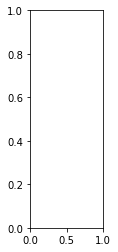

In [30]:
plt.figure(24)

for coluna in range(12):
    plt.subplot(141)
    sns.distplot(red_drop.iloc[:,[coluna]])
    plt.show()
    #plt.subplot(142)
    #red.iloc[:,[coluna].plot.box(figsize=(20,5))

(0, 0)
(0, 0)


<ipython-input-52-869af4245eb9>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(141)
<ipython-input-52-869af4245eb9>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(142)


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

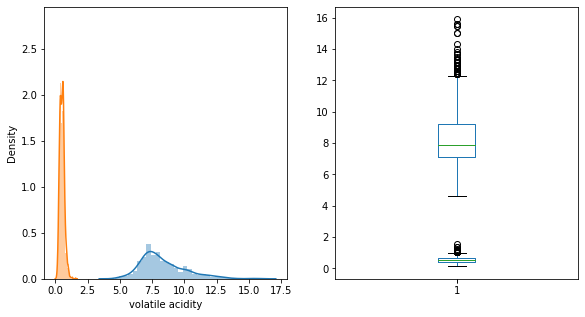

In [52]:
for key, value in enumerate(red.columns):
#     if len(columns) % 2 == 0:
        print(columns)
        plt.figure(24)
        plt.subplot(141)
        sns.distplot(red[value])
        plt.subplot(142)
        red[value].plot.box(figsize=(20,5))
#     elif len(columns) % 2 != 0:
#         print(len(columns))
#         plt.subplot(143)
#         sns.distplot(red[columns])
#         plt.subplot(144)
#         red[columns].boxplot(figsize=(20,5))
#         plt.show()